In [2]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [3]:
data_dict=pd.read_excel('Customer Churn Data.xlsx')

In [4]:
data_dict

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,Variable,Description
1,NaN,AccountID,account unique identifier
2,NaN,Churn,account churn flag (Target)
3,NaN,Tenure,Tenure of account
4,NaN,City_Tier,Tier of primary customer's city
5,NaN,CC_Contacted_L12m,How many times all the customers of the accoun...
6,NaN,Payment,Preferred Payment mode of the customers in the...
7,NaN,Gender,Gender of the primary customer of the account
8,NaN,Service_Score,Satisfaction score given by customers of the a...
9,NaN,Account_user_count,Number of customers tagged with this account


In [5]:
df=pd.read_excel('Customer Churn Data.xlsx',sheet_name='Data for DSBA')

In [6]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [7]:
df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [9]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [10]:
lst = ['Tenure', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
for col in lst:
    lst2=[]
    for i in range(len(df[col])):
        if isfloat(df.loc[i,col]):
            pass
        else:
            lst2.append(df.loc[i,col])
    print (col,'\n------------------')
    print(set(lst2))

Tenure 
------------------
{'#'}
Account_user_count 
------------------
{'@'}
rev_per_month 
------------------
{'+'}
rev_growth_yoy 
------------------
{'$'}
coupon_used_for_payment 
------------------
{'#', '$', '*'}
Day_Since_CC_connect 
------------------
{'$'}
cashback 
------------------
{'$'}


In [11]:
lst = ['Tenure', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
for col in lst:
    sum = 0
    count=0
    for i in range(len(df[col])):
        if isfloat(df.loc[i,col]) and np.isnan(df.loc[i,col])!=True:
            sum+=df.loc[i,col]
            count+=1
        else:
            pass
    print(sum/count)
    for i in range(len(df[col])):
        if isfloat(df.loc[i,col]) and np.isnan(df.loc[i,col])==True:
            pass
        else:
            if col=='Account_user_count':
                df.loc[i,col] = int(sum/count)
            else:
                df.loc[i,col] = sum/count

11.025086035138562
3.6928624260355027
6.362594326105645
16.1933907790708
1.7906191702940393
4.6331865712713265
196.23636970427467


In [12]:
df[['Tenure', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']] = df[['Tenure', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [13]:
df.shape

(11260, 19)

In [14]:
df1=df.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode']=df.mode().T[0]
# df1['mode2']=df.mode().T[1]
#df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

,mean,std,min,25%,median,75%,max,range,IQR,CV,mode
AccountID,25629.50,3250.63,20000.00,22814.75,25629.50,28444.25,31259.00,11259.0,5629.5,0.13,20000
Churn,0.17,0.37,0.00,0.00,0.00,0.00,1.00,1.0,0.0,2.22,0.0
Tenure,11.03,0.00,11.03,11.03,11.03,11.03,11.03,0.0,0.0,0.00,11.025086
City_Tier,1.65,0.92,1.00,1.00,1.00,3.00,3.00,2.0,2.0,0.55,1.0
CC_Contacted_LY,17.87,8.85,4.00,11.00,16.00,23.00,132.00,128.0,12.0,0.50,14.0
Service_Score,2.90,0.73,0.00,2.00,3.00,3.00,5.00,5.0,1.0,0.25,3.0
Account_user_count,3.00,0.00,3.00,3.00,3.00,3.00,3.00,0.0,0.0,0.00,3.0
CC_Agent_Score,3.07,1.38,1.00,2.00,3.00,4.00,5.00,4.0,2.0,0.45,3.0
rev_per_month,6.36,0.00,6.36,6.36,6.36,6.36,6.36,0.0,0.0,0.00,6.362594
Complain_ly,0.29,0.45,0.00,0.00,0.00,1.00,1.00,1.0,1.0,1.58,0.0


In [15]:
df.isnull().sum().sum()

2676

In [16]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [17]:
df.describe(include='object').T

,count,unique,top,freq
Payment,11151,5,Debit Card,4587
Gender,11152,4,Male,6328
account_segment,11163,7,Super,4062
Marital_Status,11048,3,Married,5860
Login_device,11039,3,Mobile,7482


In [18]:
df2 = pd.DataFrame(df.describe(include='object').T)
df2.index

Index(['Payment', 'Gender', 'account_segment', 'Marital_Status',
       'Login_device'],
      dtype='object')

In [19]:
dups = df.duplicated()
print('Number of duplicate rows =',dups.sum())
df[dups]

Number of duplicate rows = 0


,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


C:\Users\cools\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


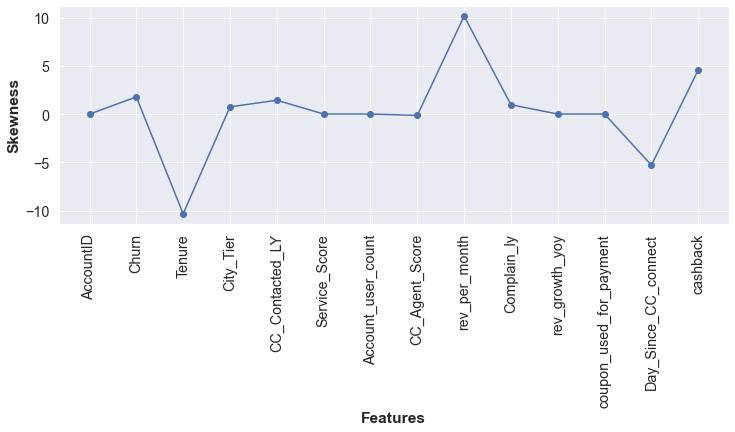

In [41]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
for col in newdf.columns:
    newdf[col].fillna(newdf[col].mean(),inplace=True)
sk=pd.DataFrame(stats.skew(newdf))
sk.index=newdf.columns
sns.set(font_scale=1.3)
ax = sk.plot(kind='line',grid=1,figsize=(12,4),rot=90,marker='o',legend=0,xticks=range(len(newdf.columns)));
ax.set_xticklabels(newdf.columns)
plt.xlabel('Features',weight='bold')
plt.ylabel('Skewness',weight='bold')
plt.show()
sns.set(font_scale=1.0)

In [147]:
sk1=sk.rename(columns = {0:'Skewness'})
round(sk1,2)

,Skewness
AccountID,0.00
Churn,1.77
Tenure,-10.34
City_Tier,0.74
CC_Contacted_LY,1.43
Service_Score,0.00
Account_user_count,0.00
CC_Agent_Score,-0.14
rev_per_month,10.15
Complain_ly,0.97


In [148]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("--------------------------------")
    print(df[column].fillna(df[column].mean()).describe(),end=' ')
    
    
    print("\n\nDistribution of " + column)
    print("-------------------------------------")
    sns.displot(df[column].fillna(df[column].mean()), kde=1, color='m',bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("------------------------------")
    ax = sns.boxplot(x=df[column].fillna(df[column].mean()),color='y');
    plt.show() 

Description of AccountID
--------------------------------
count    11260.00000
mean     25629.50000
std       3250.62635
min      20000.00000
25%      22814.75000
50%      25629.50000
75%      28444.25000
max      31259.00000
Name: AccountID, dtype: float64 

Distribution of AccountID
-------------------------------------


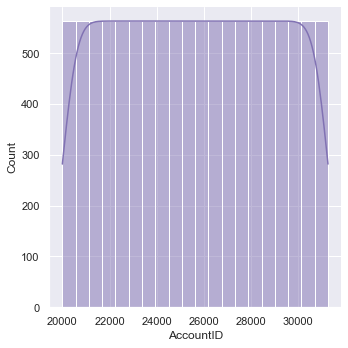

BoxPlot of AccountID
------------------------------


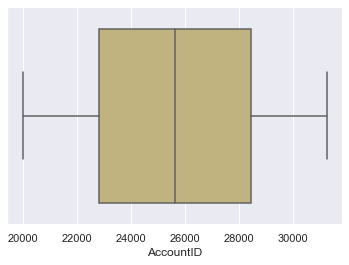

Description of Churn
--------------------------------
count    11260.000000
mean         0.168384
std          0.374223
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Churn, dtype: float64 

Distribution of Churn
-------------------------------------


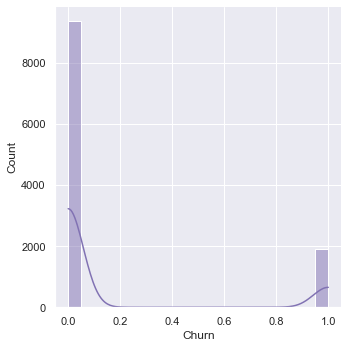

BoxPlot of Churn
------------------------------


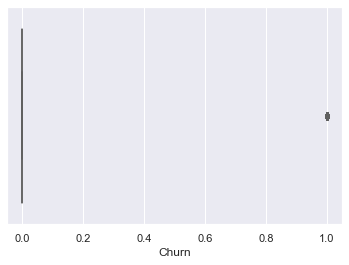

Description of Tenure
--------------------------------
count    1.126000e+04
mean     1.102509e+01
std      1.266154e-12
min      1.102509e+01
25%      1.102509e+01
50%      1.102509e+01
75%      1.102509e+01
max      1.102509e+01
Name: Tenure, dtype: float64 

Distribution of Tenure
-------------------------------------


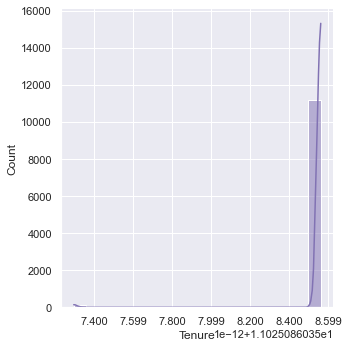

BoxPlot of Tenure
------------------------------


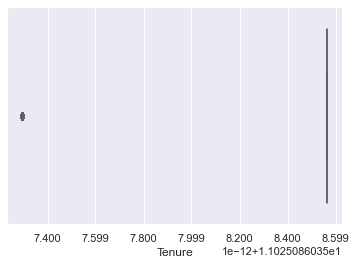

Description of City_Tier
--------------------------------
count    11260.000000
mean         1.653929
std          0.910453
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: City_Tier, dtype: float64 

Distribution of City_Tier
-------------------------------------


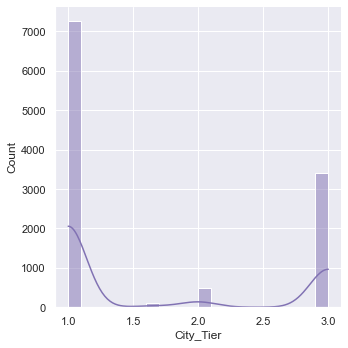

BoxPlot of City_Tier
------------------------------


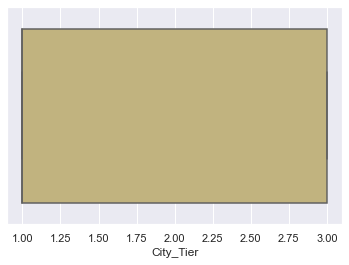

Description of CC_Contacted_LY
--------------------------------
count    11260.000000
mean        17.867091
std          8.813075
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: CC_Contacted_LY, dtype: float64 

Distribution of CC_Contacted_LY
-------------------------------------


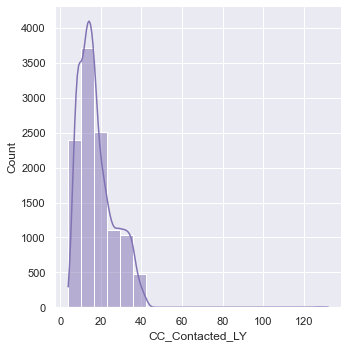

BoxPlot of CC_Contacted_LY
------------------------------


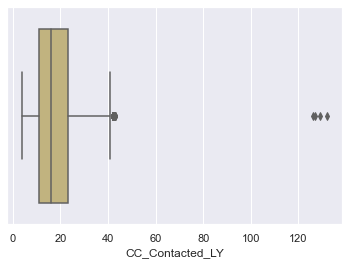

Description of Service_Score
--------------------------------
count    11260.000000
mean         2.902526
std          0.722419
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Service_Score, dtype: float64 

Distribution of Service_Score
-------------------------------------


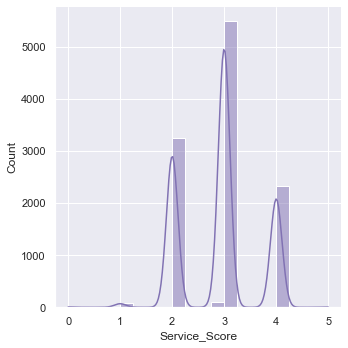

BoxPlot of Service_Score
------------------------------


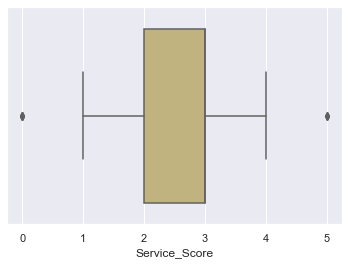

Description of Account_user_count
--------------------------------
count    11260.0
mean         3.0
std          0.0
min          3.0
25%          3.0
50%          3.0
75%          3.0
max          3.0
Name: Account_user_count, dtype: float64 

Distribution of Account_user_count
-------------------------------------


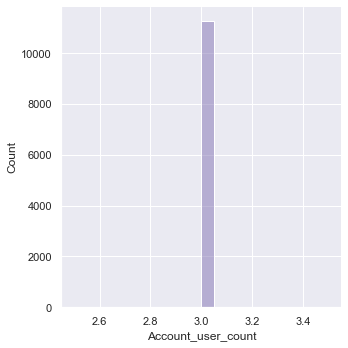

BoxPlot of Account_user_count
------------------------------


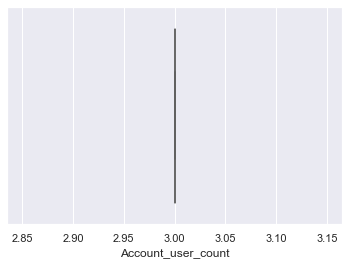

Description of CC_Agent_Score
--------------------------------
count    11260.000000
mean         3.066493
std          1.372646
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: CC_Agent_Score, dtype: float64 

Distribution of CC_Agent_Score
-------------------------------------


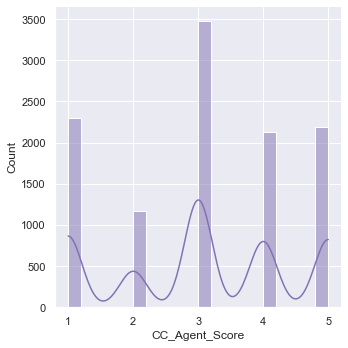

BoxPlot of CC_Agent_Score
------------------------------


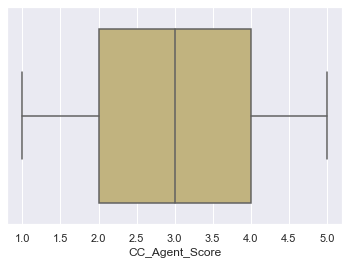

Description of rev_per_month
--------------------------------
count    1.126000e+04
mean     6.362594e+00
std      1.901769e-13
min      6.362594e+00
25%      6.362594e+00
50%      6.362594e+00
75%      6.362594e+00
max      6.362594e+00
Name: rev_per_month, dtype: float64 

Distribution of rev_per_month
-------------------------------------


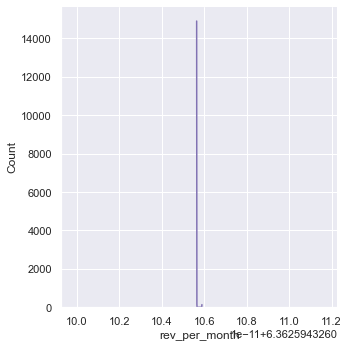

BoxPlot of rev_per_month
------------------------------


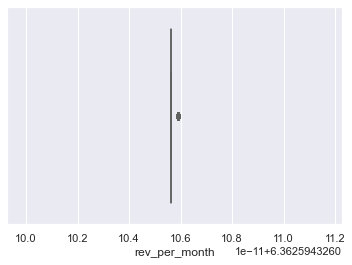

Description of Complain_ly
--------------------------------
count    11260.000000
mean         0.285334
std          0.444377
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Complain_ly, dtype: float64 

Distribution of Complain_ly
-------------------------------------


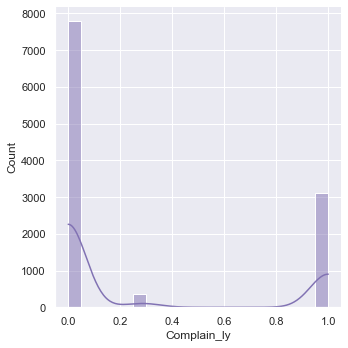

BoxPlot of Complain_ly
------------------------------


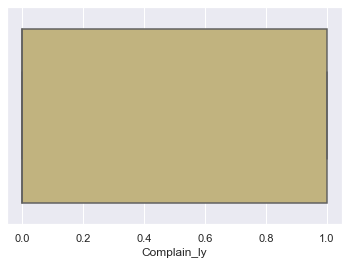

Description of rev_growth_yoy
--------------------------------
count    1.126000e+04
mean     1.619339e+01
std      1.623662e-12
min      1.619339e+01
25%      1.619339e+01
50%      1.619339e+01
75%      1.619339e+01
max      1.619339e+01
Name: rev_growth_yoy, dtype: float64 

Distribution of rev_growth_yoy
-------------------------------------


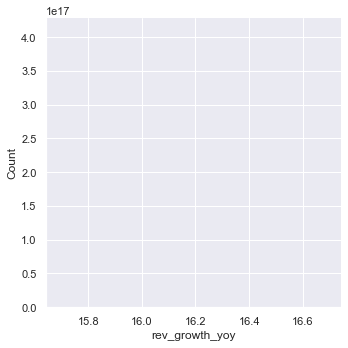

BoxPlot of rev_growth_yoy
------------------------------


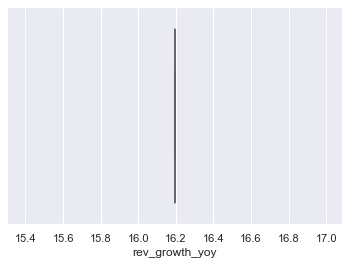

Description of coupon_used_for_payment
--------------------------------
count    1.126000e+04
mean     1.790619e+00
std      4.625395e-13
min      1.790619e+00
25%      1.790619e+00
50%      1.790619e+00
75%      1.790619e+00
max      1.790619e+00
Name: coupon_used_for_payment, dtype: float64 

Distribution of coupon_used_for_payment
-------------------------------------


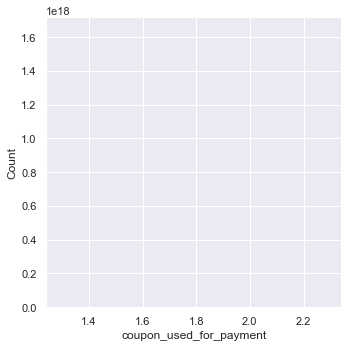

BoxPlot of coupon_used_for_payment
------------------------------


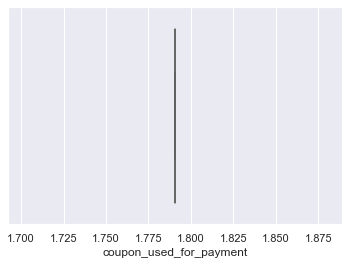

Description of Day_Since_CC_connect
--------------------------------
count    1.126000e+04
mean     4.633187e+00
std      3.600980e-13
min      4.633187e+00
25%      4.633187e+00
50%      4.633187e+00
75%      4.633187e+00
max      4.633187e+00
Name: Day_Since_CC_connect, dtype: float64 

Distribution of Day_Since_CC_connect
-------------------------------------


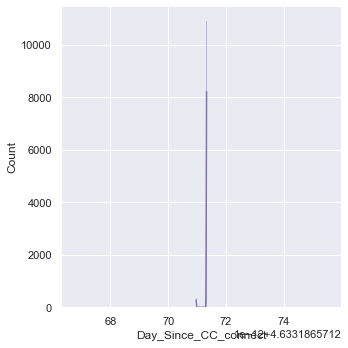

BoxPlot of Day_Since_CC_connect
------------------------------


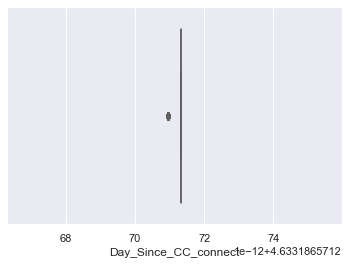

Description of cashback
--------------------------------
count    1.126000e+04
mean     1.962364e+02
std      3.620464e-11
min      1.962364e+02
25%      1.962364e+02
50%      1.962364e+02
75%      1.962364e+02
max      1.962364e+02
Name: cashback, dtype: float64 

Distribution of cashback
-------------------------------------


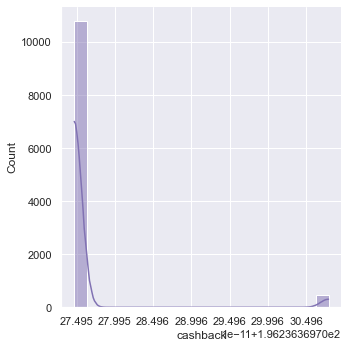

BoxPlot of cashback
------------------------------


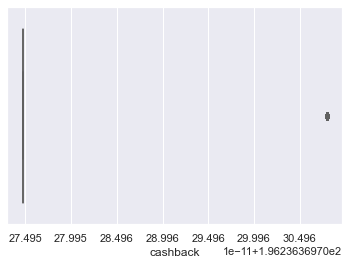

In [149]:
from numpy import linalg
lstcolumns = list(df.select_dtypes(include=numerics).columns.values)
for x in lstcolumns:
    try:
        univariateAnalysis_numeric(x,20)
    except linalg.LinAlgError as e:
        print(e)
        

In [150]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

C:\Users\cools\AppData\Local\Temp/ipykernel_19516/4287431195.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


AccountID                     0
Account_user_count            0
CC_Agent_Score                0
CC_Contacted_LY              42
Churn                      1896
City_Tier                     0
Complain_ly                   0
Day_Since_CC_connect          0
Gender                        0
Login_device                  0
Marital_Status                0
Payment                       0
Service_Score                13
Tenure                        0
account_segment               0
cashback                      0
coupon_used_for_payment       0
rev_growth_yoy                0
rev_per_month                 0
dtype: int64

25629.5
0.16838365896980462
11.02508603513729
1.6539289558665227
17.867090876501184
2.902526428955387
3.0
3.066493180186654
6.362594326105836
0.2853343116573406
16.193390779072423
1.7906191702935768
4.633186571270961
196.23636970431164


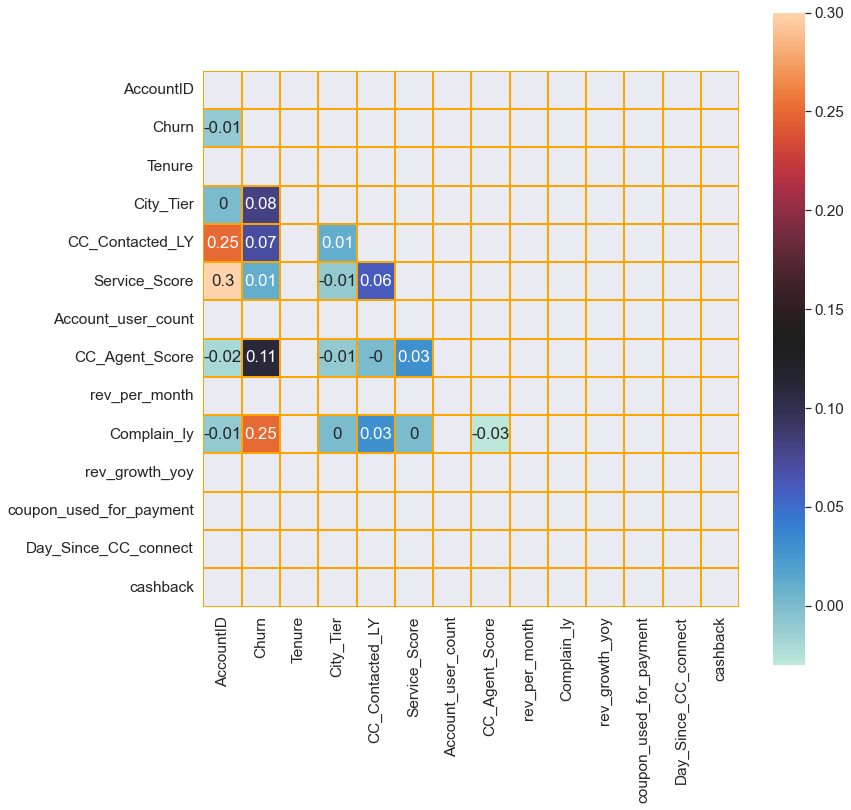

In [159]:
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(font_scale=1.4)
temp_df = df.copy()
for col in temp_df:
    try:
        temp_df[col].fillna(temp_df[col].mean(),inplace=True)
        print(temp_df[col].mean())
    except:
        temp_df[col].fillna(temp_df[col].value_counts().index[0],inplace=True)
sns.heatmap(round(temp_df.corr(),2),cmap="icefire",annot=True,linewidths=2,
                linecolor='orange',square=True,mask=mask);
sns.set(font_scale=1)

In [167]:
temp_df.isnull().sum().sum()

0

25629.5
0.16838365896980462
11.02508603513729
1.6539289558665227
17.867090876501184
2.902526428955387
3.0
3.066493180186654
6.362594326105836
0.2853343116573406
16.193390779072423
1.7906191702935768
4.633186571270961
196.23636970431164


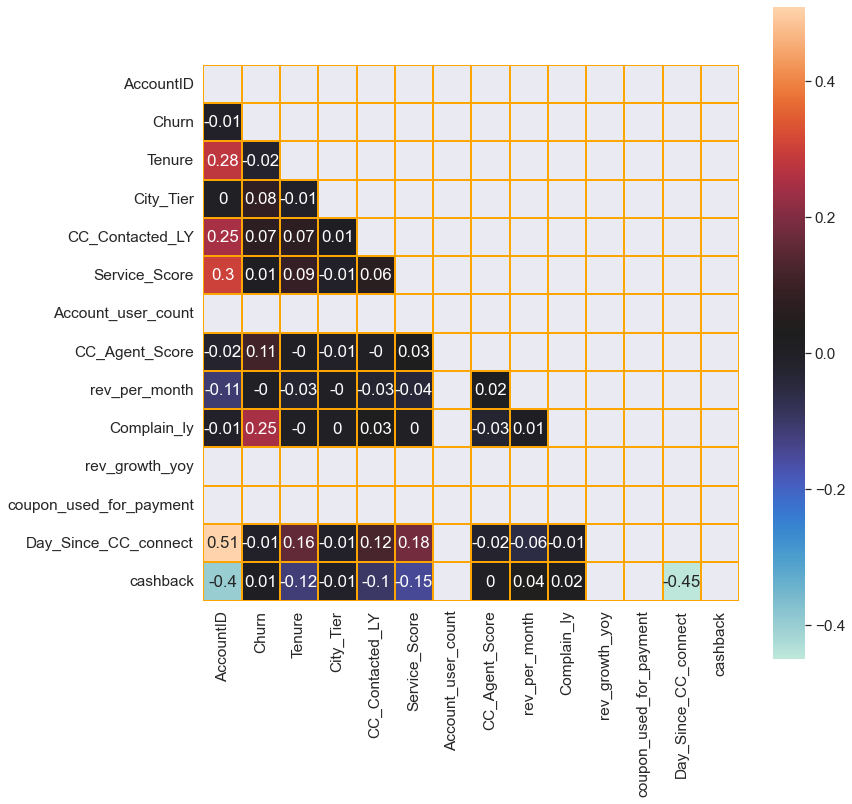

In [166]:
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(font_scale=1.4)
temp_df = df.copy()
for col in temp_df:
    try:
        temp_df[col].fillna(temp_df[col].mean(),inplace=True)
        print(temp_df[col].mean())
    except:
        temp_df[col].fillna(temp_df[col].value_counts().index[0],inplace=True)
sns.heatmap(round(temp_df.corr(),2),cmap="icefire",annot=True,linewidths=2,
                linecolor='orange',square=True,mask=mask);
sns.set(font_scale=1)

In [174]:
temp_df['Account_user_count'].value_counts()

3.0    11260
Name: Account_user_count, dtype: int64

In [175]:
temp_df['rev_growth_yoy'].value_counts()

16.193391    11260
Name: rev_growth_yoy, dtype: int64

In [176]:
temp_df['coupon_used_for_payment'].value_counts()

1.790619    11260
Name: coupon_used_for_payment, dtype: int64

In [173]:
temp_df.corr()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
AccountID,1.000000,-0.009541,0.280004,0.001974,0.251341,0.300581,NaN,-0.017629,-0.109063,-0.005086,NaN,NaN,0.509571,-0.396146
Churn,-0.009541,1.000000,-0.018549,0.083749,0.071732,0.008953,NaN,0.105195,-0.000950,0.247582,NaN,NaN,-0.014737,0.011779
Tenure,0.280004,-0.018549,1.000000,-0.009516,0.074978,0.092198,NaN,-0.003782,-0.030111,-0.001948,NaN,NaN,0.164860,-0.118798
City_Tier,0.001974,0.083749,-0.009516,1.000000,0.011712,-0.006384,NaN,-0.011361,-0.001842,0.002427,NaN,NaN,-0.008593,-0.009059
CC_Contacted_LY,0.251341,0.071732,0.074978,0.011712,1.000000,0.059546,NaN,-0.000207,-0.025078,0.026682,NaN,NaN,0.122487,-0.096399
Service_Score,0.300581,0.008953,0.092198,-0.006384,0.059546,1.000000,NaN,0.031846,-0.040468,0.002589,NaN,NaN,0.179782,-0.146868
Account_user_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,-0.017629,0.105195,-0.003782,-0.011361,-0.000207,0.031846,NaN,1.000000,0.022391,-0.030861,NaN,NaN,-0.017426,0.002455
rev_per_month,-0.109063,-0.000950,-0.030111,-0.001842,-0.025078,-0.040468,NaN,0.022391,1.000000,0.013300,NaN,NaN,-0.059737,0.037876
Complain_ly,-0.005086,0.247582,-0.001948,0.002427,0.026682,0.002589,NaN,-0.030861,0.013300,1.000000,NaN,NaN,-0.007589,0.020372


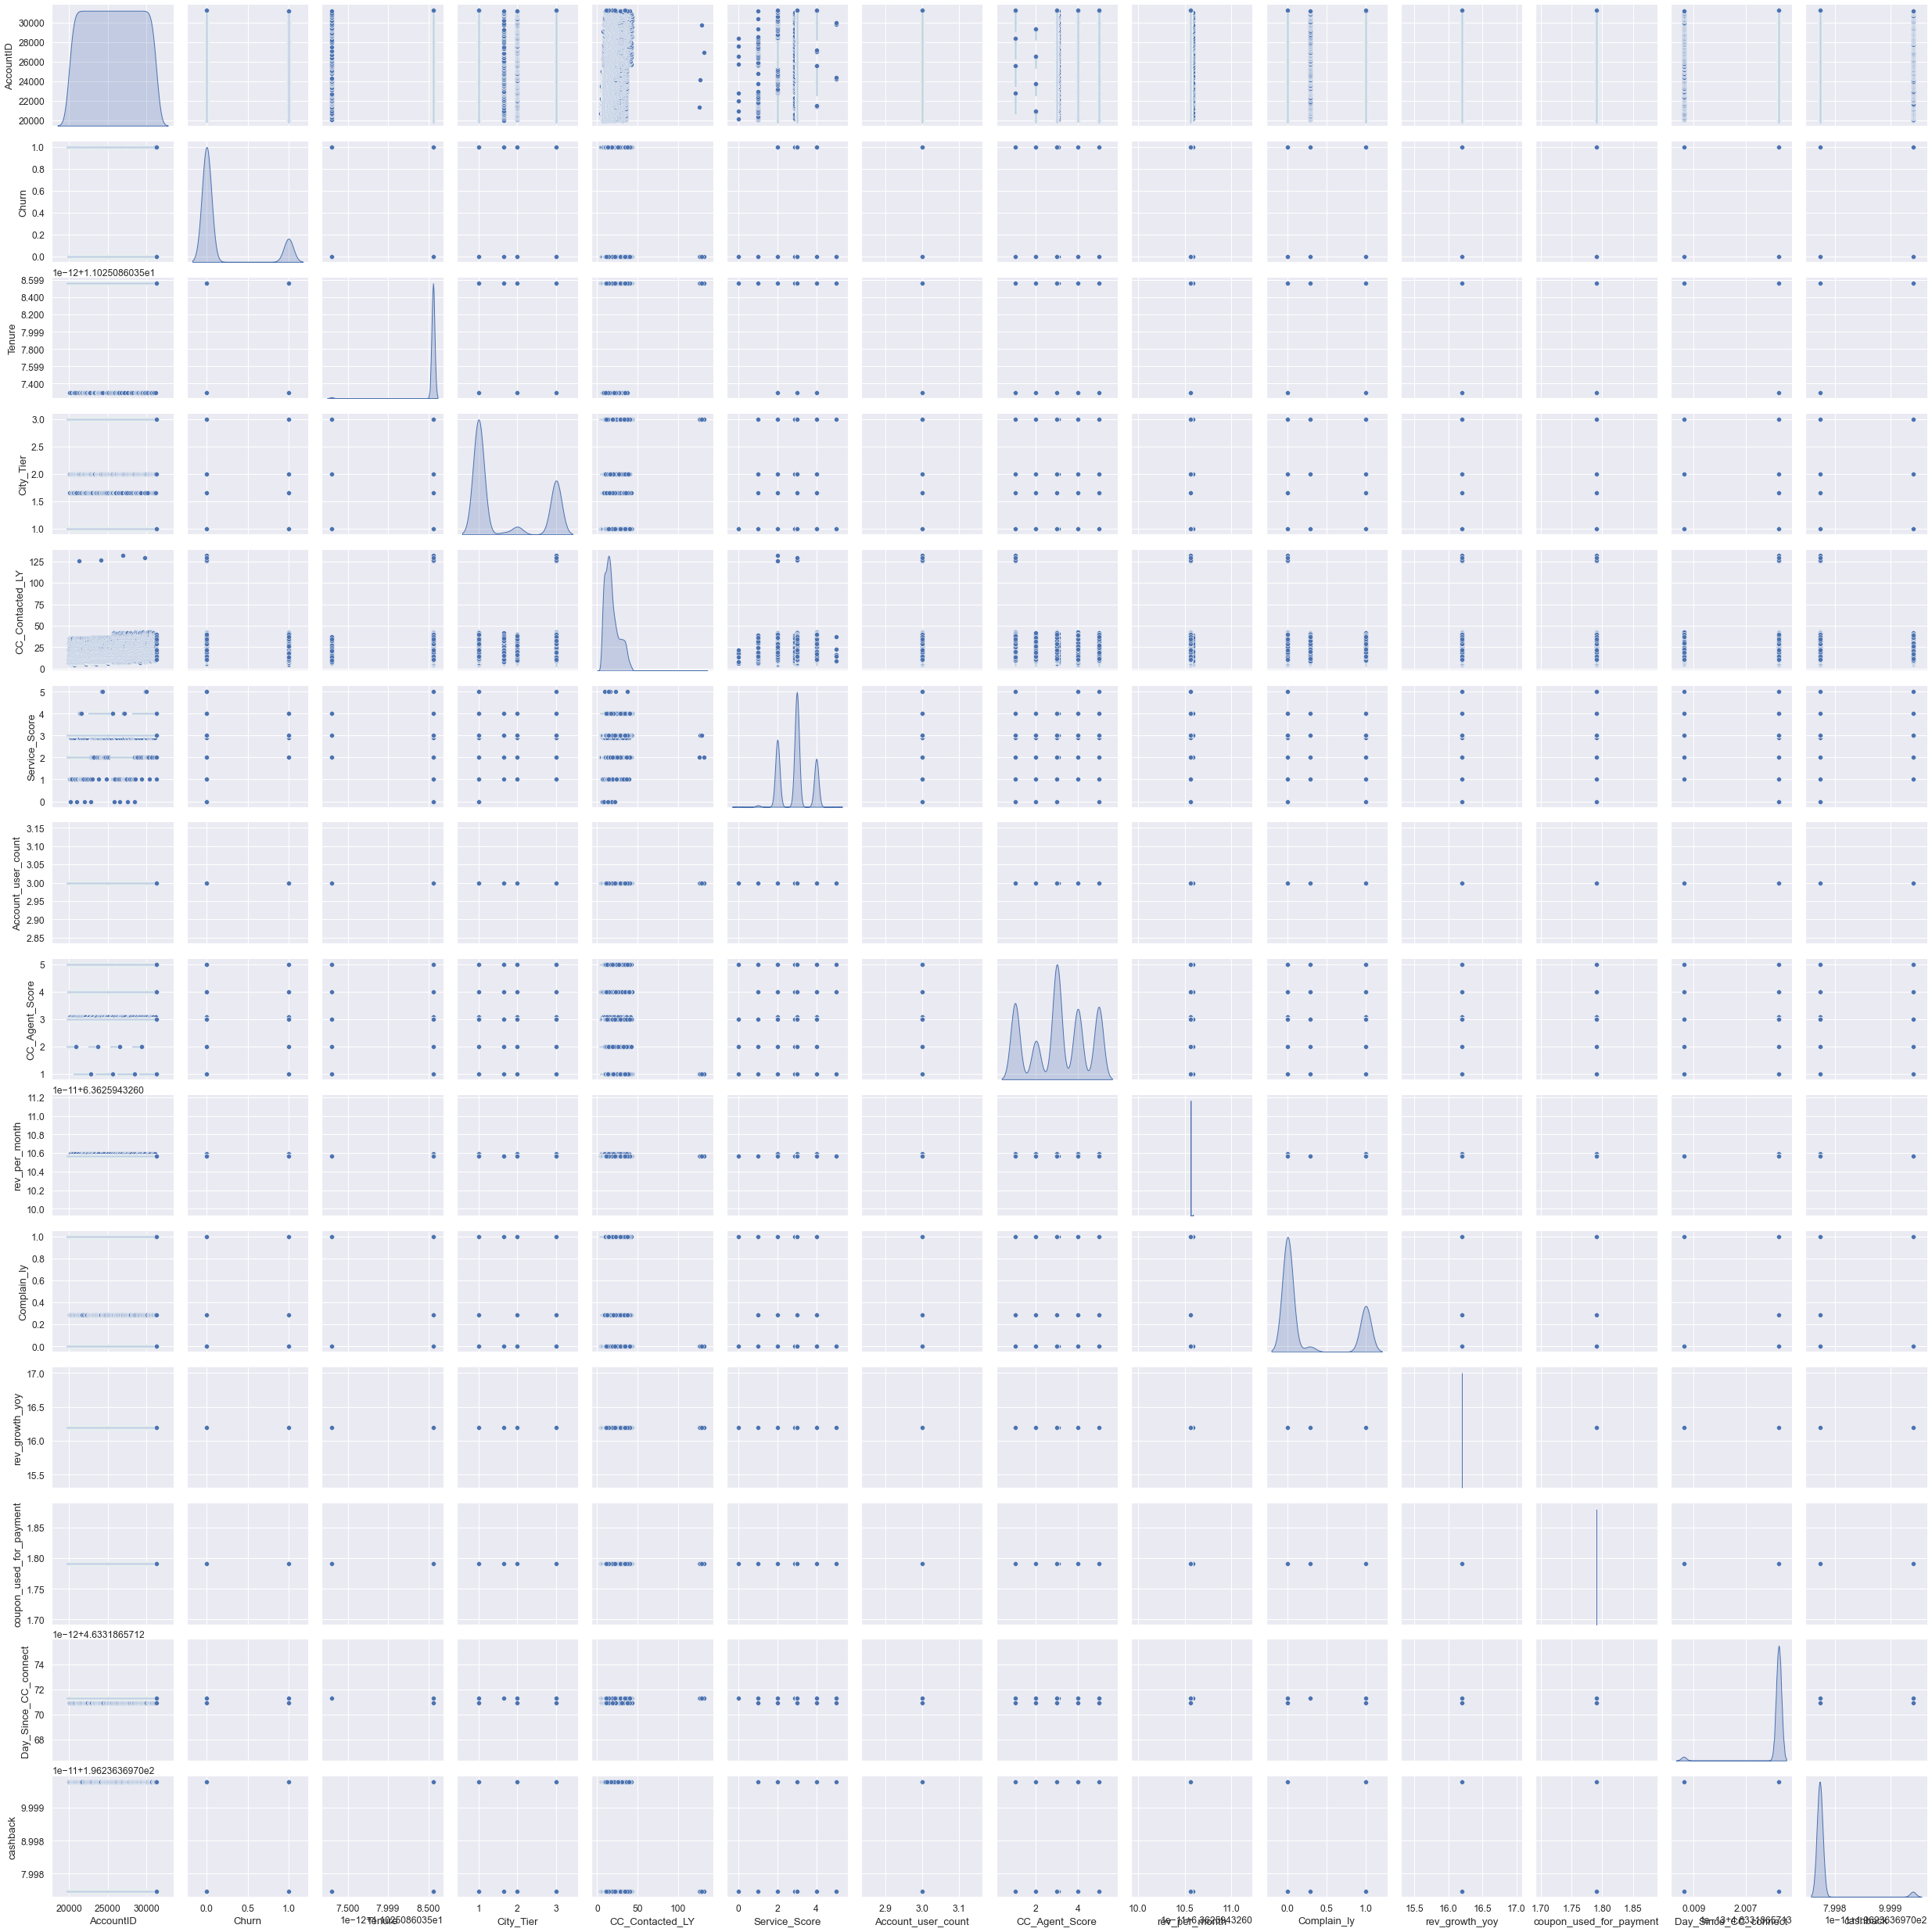

In [172]:
sns.set(font_scale=1.1)
sns.pairplot(temp_df,diag_kind='kde').savefig('out.jpg')
sns.set(font_scale=1)

In [153]:
for column in df.columns: 
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique(),'unique values')
        print('--------------------')
        print(df[column].value_counts())
        print('\n',column.upper(),'(normalized)')
        print('--------------------')
        print(df[column].value_counts(normalize=1))
        print('\n*************************************************\n\n')

PAYMENT :  5 unique values
--------------------
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

 PAYMENT (normalized)
--------------------
Debit Card          0.411353
Credit Card         0.314860
E wallet            0.109138
Cash on Delivery    0.090934
UPI                 0.073715
Name: Payment, dtype: float64

*************************************************


GENDER :  4 unique values
--------------------
Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

 GENDER (normalized)
--------------------
Male      0.567432
Female    0.374641
M         0.033716
F         0.024211
Name: Gender, dtype: float64

*************************************************


ACCOUNT_SEGMENT :  7 unique values
--------------------
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +   

In [50]:
df['Gender'].replace(to_replace='Male', value='M', inplace=True)
df['Gender'].replace(to_replace='Female', value='F', inplace=True)
df['account_segment'].replace(to_replace='Super Plus', value='Super +', inplace=True)
df['account_segment'].replace(to_replace='Regular Plus', value='Regular +', inplace=True)
df['Login_device'].replace(to_replace='&&&&', value='Unnamed', inplace=True)

In [51]:
for column in df.columns: 
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique(),'unique values')
        print('--------------------')
        print(df[column].value_counts())
        print('\n',column.upper(),'(normalized)')
        print('--------------------')
        print(df[column].value_counts(normalize=1))
        print('\n*************************************************\n\n')

PAYMENT :  5 unique values
--------------------
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

 PAYMENT (normalized)
--------------------
Debit Card          0.411353
Credit Card         0.314860
E wallet            0.109138
Cash on Delivery    0.090934
UPI                 0.073715
Name: Payment, dtype: float64

*************************************************


GENDER :  2 unique values
--------------------
M    6704
F    4448
Name: Gender, dtype: int64

 GENDER (normalized)
--------------------
M    0.601148
F    0.398852
Name: Gender, dtype: float64

*************************************************


ACCOUNT_SEGMENT :  5 unique values
--------------------
Regular +    4124
Super        4062
HNI          1639
Super +       818
Regular       520
Name: account_segment, dtype: int64

 ACCOUNT_SEGMENT (normalized)
--------------------
Regular +    0.369435
Super        0.363881
HN

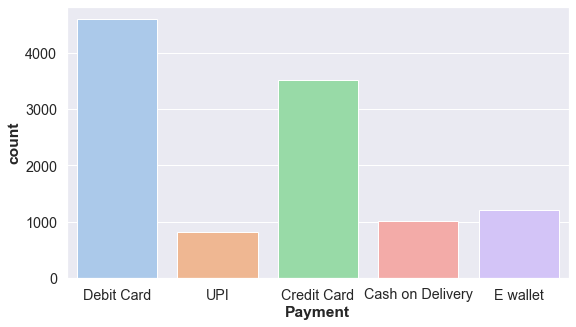

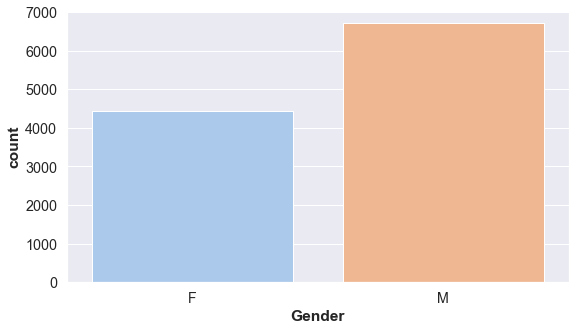

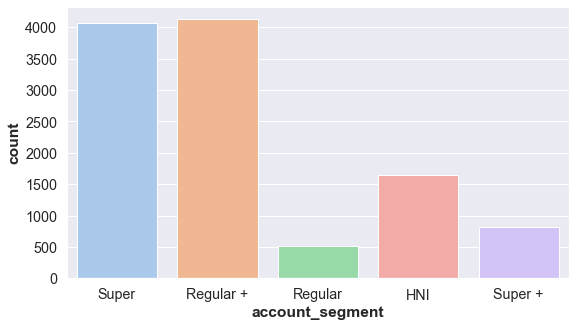

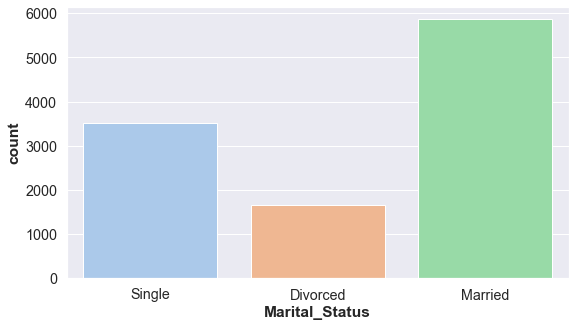

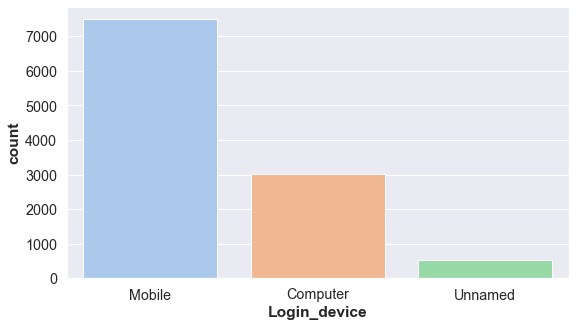

In [183]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 9,5

sns.set(font_scale=1.3)
for column in df.columns: 
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df, palette='pastel')
        plt.ylabel('count',weight="bold")
        plt.xlabel(column,weight="bold")
        plt.show()
sns.set(font_scale=1)

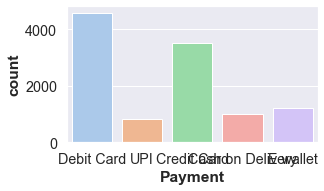

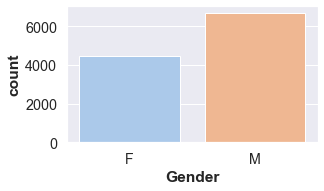

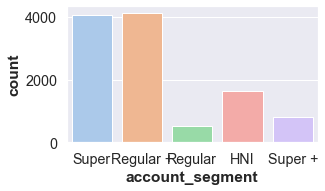

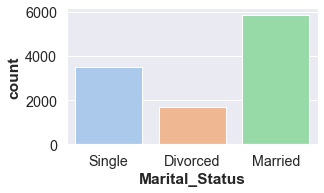

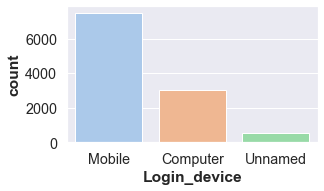

In [184]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 4.5,2.5

sns.set(font_scale=1.3)
for column in df.columns: 
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df, palette='pastel')
        plt.ylabel('count',weight="bold")
        plt.xlabel(column,weight="bold")
        plt.show()
sns.set(font_scale=1)

In [42]:
for column in df.columns: 
    if column == 'Churn':
        print(column.upper(),': ',df[column].nunique(),'unique values')
        print('--------------------')
        print(df[column].value_counts())
        print('\n',column.upper(),'(normalized)')
        print('--------------------')
        print(df[column].value_counts(normalize=1))
        print('\n*************************************************\n\n')

CHURN :  2 unique values
--------------------
0    9364
1    1896
Name: Churn, dtype: int64

 CHURN (normalized)
--------------------
0    0.831616
1    0.168384
Name: Churn, dtype: float64

*************************************************




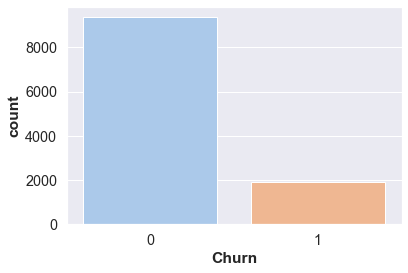

In [44]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 6,4

sns.set(font_scale=1.3)
for column in df.columns: 
    if column == 'Churn':
        sns.countplot(x=column, data=df, palette='pastel')
        plt.ylabel('count',weight="bold")
        plt.xlabel(column,weight="bold")
        plt.show()
sns.set(font_scale=1)

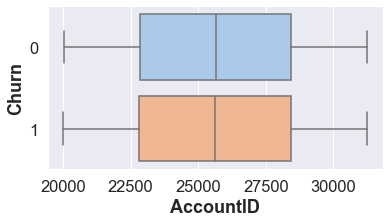

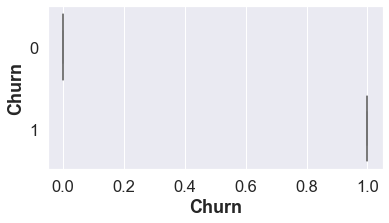

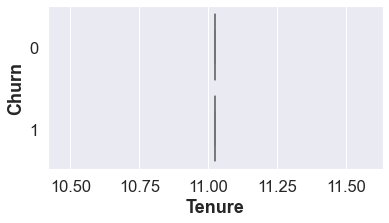

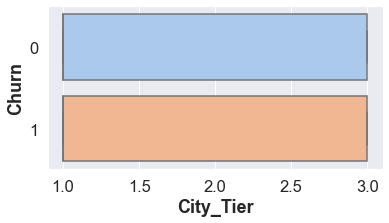

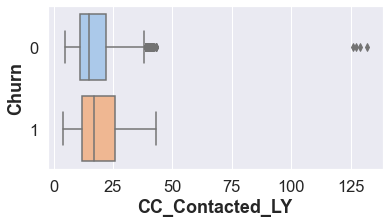

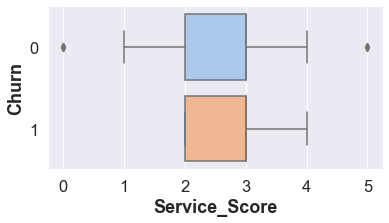

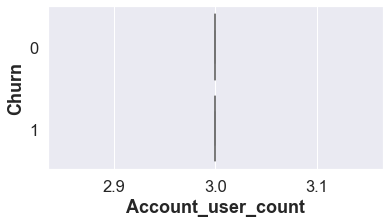

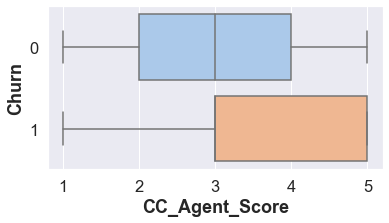

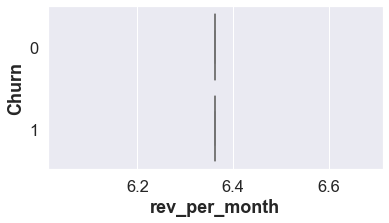

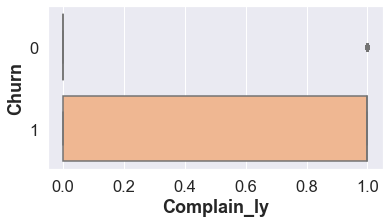

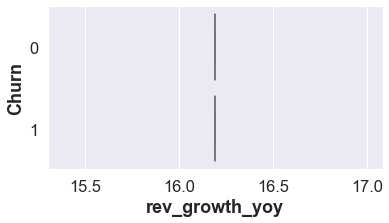

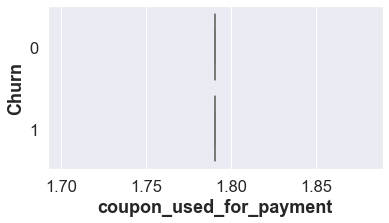

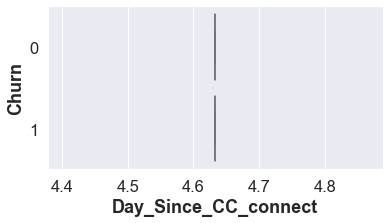

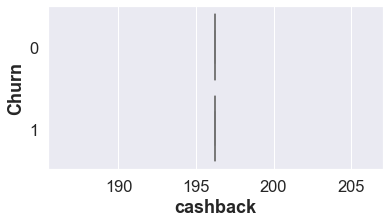

In [54]:
sns.set(font_scale=1.5)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
lstcolumns = list(df.select_dtypes(include=numerics).columns.values)
for val in lstcolumns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=val, y='Churn', data=df, palette='pastel',orient='h')
        plt.xlabel(val,weight="bold")
        plt.ylabel('Churn',weight="bold")
        plt.show()
sns.set(font_scale=1)

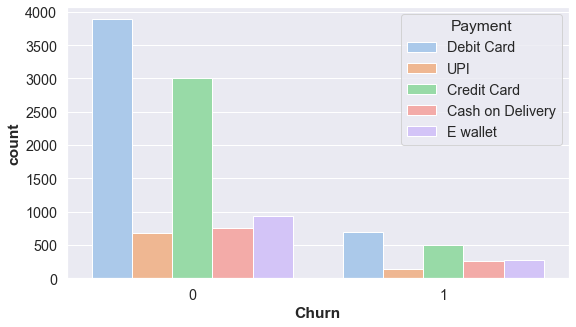

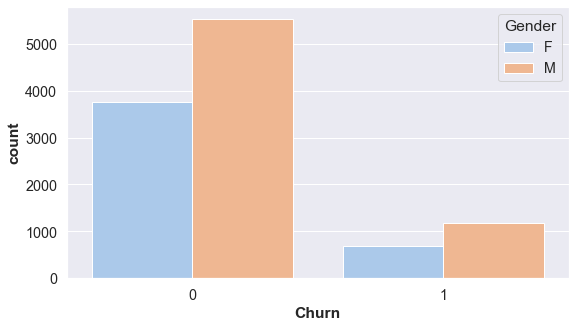

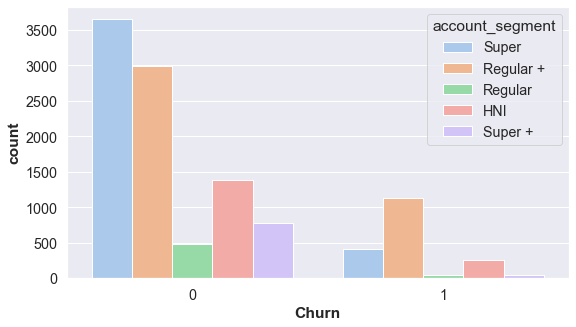

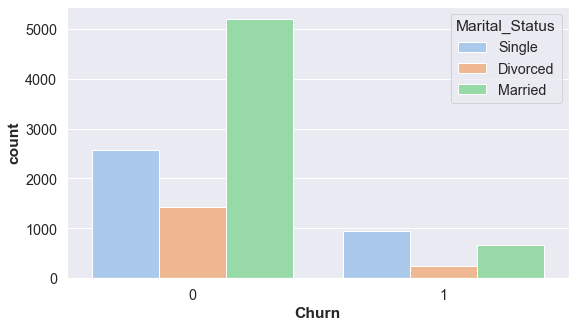

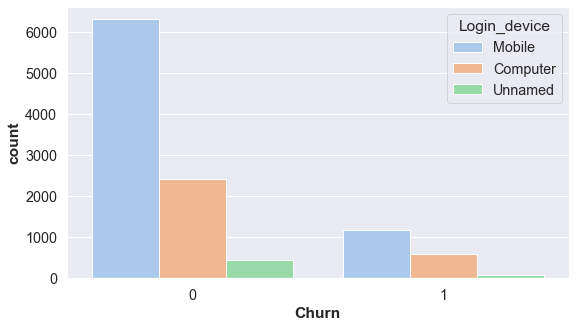

In [52]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 9,5

sns.set(font_scale=1.3)
for column in df.columns: 
    if df[column].dtype == 'object':
        sns.countplot(x='Churn',hue=column, data=df, palette='pastel')
        plt.ylabel('count',weight="bold")
        plt.xlabel('Churn',weight="bold")
        plt.show()
sns.set(font_scale=1)